In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm
import seaborn as sns
from IPython import display
import geopandas as gpd

In [2]:
ts1w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_water.csv', index_col=[0])
ts2w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_water.csv', index_col=[0])
ts3w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_water.csv', index_col=[0])
ts4w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_water.csv', index_col=[0])
bigTSwater = pd.concat([ts1w, ts2w, ts3w, ts4w], axis=1)
bigTSwaterOG = pd.concat([ts1w, ts2w, ts3w, ts4w], axis=1)

In [9]:
#apino = bigTSwater.columns.values[0:500]
apino = bigTSwater.max().sort_values(ascending=False).index.values
for well in tqdm(apino):
    if bigTSwater[well].max() > 0:
        mean = bigTSwater[well].mean()
        q = bigTSwater[well].quantile(0.9999)+1
        bigTSwater.loc[bigTSwater[well]>q, well] = np.nan
        bigTSwater.fillna(mean)
    else:
        pass


100%|██████████████████████████████████████████████████████████████████████████| 76953/76953 [6:21:02<00:00,  3.37it/s]


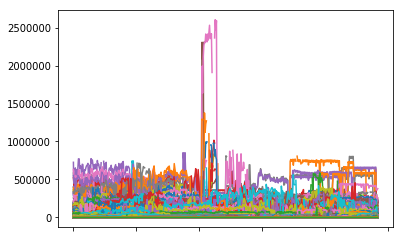

In [20]:
bigTSwater.plot(legend=False)

In [21]:
bigTSwater.to_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\water.csv')

In [12]:
bigTSwater['1705735'].max()

935652.0

In [22]:
ts1g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_gas.csv', index_col=[0])
ts2g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_gas.csv', index_col=[0])
ts3g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_gas.csv', index_col=[0])
ts4g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_gas.csv', index_col=[0])
bigTSgas = pd.concat([ts1g, ts2g, ts3g, ts4g], axis=1)

In [ ]:
apino = bigTSgas.max().sort_values(ascending=True).index.values
for well in tqdm(apino):
    if bigTSgas[well].max() > 0:
        mean = bigTSgas[well].mean()
        q = bigTSgas[well].quantile(0.9999)+1
        bigTSgas.loc[bigTSgas[well]>q, well] = np.nan
        bigTSgas.fillna(mean)
    else:
        pass

 37%|██████████████████████████▍                                             | 28266/76953 [1:12:35<2:05:01,  6.49it/s]

In [ ]:
bigTSgas.plot(legend=False)

In [ ]:
bigTSwater.to_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\gas.csv')